In [65]:
import pandas as pd
df=pd.read_csv('malicious_phish.csv')

print(df.shape)
df.head()


(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [66]:
df.isnull().sum()

url     0
type    0
dtype: int64

# Feature Engineering

In [67]:
import re

def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        
        return 1
    else:
        
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [68]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
      
        return 1
    else:
        
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [5]:
!pip install googlesearch-python


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:

from googlesearch import search

def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [70]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.
0,br-icloud.com.br,phishing,0,0,1,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2


In [71]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

def count_atrate(url):
     
    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))


def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
    
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

<>:28: SyntaxWarning: invalid escape sequence '\.'
<>:29: SyntaxWarning: invalid escape sequence '\.'
<>:30: SyntaxWarning: invalid escape sequence '\.'
<>:31: SyntaxWarning: invalid escape sequence '\.'
<>:32: SyntaxWarning: invalid escape sequence '\.'
<>:33: SyntaxWarning: invalid escape sequence '\.'
<>:34: SyntaxWarning: invalid escape sequence '\.'
<>:35: SyntaxWarning: invalid escape sequence '\.'
<>:28: SyntaxWarning: invalid escape sequence '\.'
<>:29: SyntaxWarning: invalid escape sequence '\.'
<>:30: SyntaxWarning: invalid escape sequence '\.'
<>:31: SyntaxWarning: invalid escape sequence '\.'
<>:32: SyntaxWarning: invalid escape sequence '\.'
<>:33: SyntaxWarning: invalid escape sequence '\.'
<>:34: SyntaxWarning: invalid escape sequence '\.'
<>:35: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7100\2589731032.py:28: SyntaxWarning: invalid escape sequence '\.'
  match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t

In [72]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

In [73]:
def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')
df['count='] = df['url'].apply(lambda i: count_equal(i))

def url_length(url):
    return len(str(url))



df['url_length'] = df['url'].apply(lambda i: url_length(i))


def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

df.head()

def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


df['count-digits']= df['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['url'].apply(lambda i: letter_count(i))

df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,...,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,0,0,0,1,0,16,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,0,0,0,35,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,0,0,0,31,0,0,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,...,1,0,1,1,4,88,21,0,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,...,1,0,1,1,3,235,23,0,22,199


In [74]:
!pip install tld


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
from urllib.parse import urlparse
from tld import get_tld
import os.path

def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [76]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domian', 'short_url',
       'count-https', 'count-http', 'count%', 'count?', 'count-', 'count=',
       'url_length', 'hostname_length', 'sus_url', 'count-digits',
       'count-letters', 'fd_length', 'tld', 'tld_length'],
      dtype='object')

In [77]:
df['type'].unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [78]:
df

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,...,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length,tld,tld_length
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,1,0,16,0,0,0,13,0,None,-1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,35,0,0,1,29,5,None,-1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,31,0,0,1,25,7,None,-1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,...,1,4,88,21,0,7,63,9,be,2
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,...,1,3,235,23,0,22,199,9,net,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,0,1,3,0,0,3,0,...,0,0,39,0,0,12,21,7,None,-1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,0,1,2,0,0,4,0,...,2,0,44,0,0,7,29,8,None,-1
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,0,1,2,1,0,4,0,...,0,0,42,0,0,3,33,7,None,-1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,0,1,2,0,0,2,0,...,0,0,45,0,0,0,36,4,None,-1


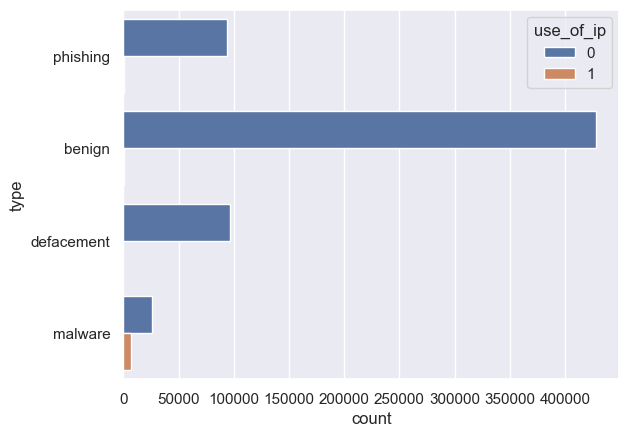

In [16]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="use_of_ip")

In [79]:
df['type'].unique()

array(['phishing', 'benign', 'defacement', 'malware'], dtype=object)

In [80]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Transform 'type' column into numerical values
df['type_encoded'] = label_encoder.fit_transform(df['type'])

# Display the DataFrame
print(df['type_encoded'])
df=df.drop(columns=['type'])
df

0         3
1         0
2         0
3         1
4         1
         ..
651186    3
651187    3
651188    3
651189    3
651190    3
Name: type_encoded, Length: 651191, dtype: int32


,url,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,short_url,...,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length,tld,tld_length,type_encoded
0,br-icloud.com.br,0,0,1,2,0,0,0,0,0,...,0,16,0,0,0,13,0,None,-1,3
1,mp3raid.com/music/krizz_kaliko.html,0,0,1,2,0,0,2,0,0,...,0,35,0,0,1,29,5,None,-1,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,1,2,0,0,3,0,0,...,0,31,0,0,1,25,7,None,-1,0
3,http://www.garage-pirenne.be/index.php?option=...,0,1,1,3,1,0,1,0,0,...,4,88,21,0,7,63,9,be,2,1
4,http://adventure-nicaragua.net/index.php?optio...,0,1,1,2,0,0,1,0,0,...,3,235,23,0,22,199,9,net,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,0,0,1,3,0,0,3,0,0,...,0,39,0,0,12,21,7,None,-1,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,0,0,1,2,0,0,4,0,1,...,0,44,0,0,7,29,8,None,-1,3
651188,www.gamespot.com/xbox360/action/deadspace/,0,0,1,2,1,0,4,0,1,...,0,42,0,0,3,33,7,None,-1,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),0,0,1,2,0,0,2,0,0,...,0,45,0,0,0,36,4,None,-1,3


In [42]:
print("Mapping of encoded values to labels:")
for idx, label in enumerate(label_encoder.classes_):
    print(f"{idx} -> {label}")


Mapping of encoded values to labels:
0 -> benign
1 -> defacement
2 -> malware
3 -> phishing


In [43]:
df['type_encoded'].unique()

array([3, 0, 1, 2])

In [81]:

X = df.drop(columns=['type_encoded','url','tld']) 

y = df['type_encoded']  # Assign 'type' as the target variable

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(520952, 22)
(130239, 22)
(520952,)
(130239,)


# Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[83819    35    25  1828]
 [   20 18986    70   204]
 [   33    49  6254   314]
 [ 2368   353   193 15688]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     85707
           1       0.98      0.98      0.98     19280
           2       0.96      0.94      0.95      6650
           3       0.87      0.84      0.86     18602

    accuracy                           0.96    130239
   macro avg       0.94      0.94      0.94    130239
weighted avg       0.96      0.96      0.96    130239



In [14]:
X.columns

Index(['use_of_ip', 'abnormal_url', 'google_index', 'count.', 'count-www',
       'count@', 'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'count-digits', 'count-letters',
       'fd_length', 'tld_length'],
      dtype='object')

# RANDOM FOREST (KNOWN TO PRODUCE MORE ACCURACY)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     85778
           1       0.98      0.99      0.99     19104
           2       0.99      0.94      0.96      6521
           3       0.90      0.86      0.88     18836

    accuracy                           0.97    130239
   macro avg       0.96      0.94      0.95    130239
weighted avg       0.97      0.97      0.97    130239



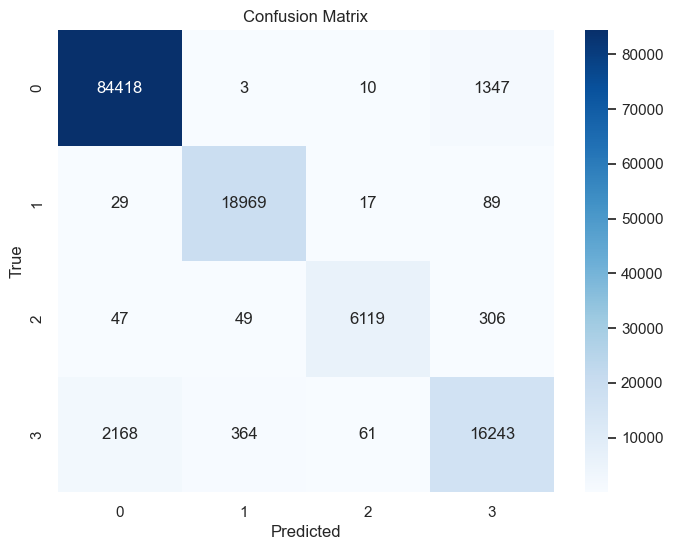

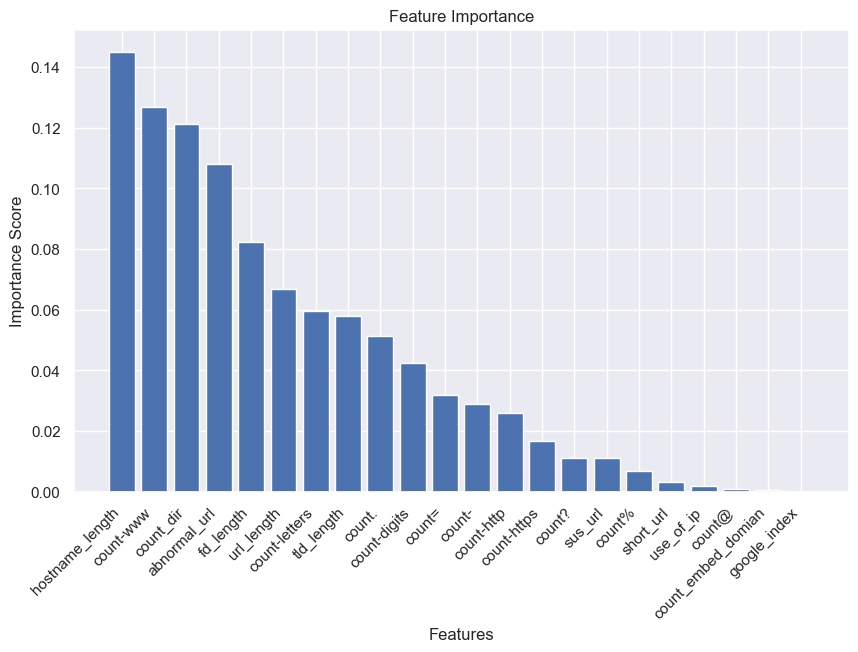

In [182]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance Plot
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order
feature_names = X_train.columns  # Get feature names from DataFrame

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [65]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.97      0.98      0.98     85576
           1       0.98      0.99      0.99     19201
           2       0.99      0.94      0.96      6529
           3       0.91      0.86      0.88     18933

    accuracy                           0.97    130239
   macro avg       0.96      0.95      0.95    130239
weighted avg       0.97      0.97      0.97    130239



In [66]:
import joblib

# Save the trained model
joblib.dump(rfc, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [67]:
from IPython.display import FileLink

# Create a clickable link to download 'password_model.pkl'
FileLink('random_forest_model.pkl')


C:\Users\Lenovo\MAINPROJECT\random_forest_model.pkl

# 1feature combination and RF

In [28]:
from itertools import combinations

features = ['use_of_ip', 'abnormal_url', 'google_index', 'count.', 'count-www',
       'count@', 'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'count-digits', 'count-letters',
       'fd_length', 'tld_length']
all_combinations = []

for r in range(1, 2):
    all_combinations.extend(combinations(features, r))
all_combinations

[('use_of_ip',),
 ('abnormal_url',),
 ('google_index',),
 ('count.',),
 ('count-www',),
 ('count@',),
 ('count_dir',),
 ('count_embed_domian',),
 ('short_url',),
 ('count-https',),
 ('count-http',),
 ('count%',),
 ('count?',),
 ('count-',),
 ('count=',),
 ('url_length',),
 ('hostname_length',),
 ('sus_url',),
 ('count-digits',),
 ('count-letters',),
 ('fd_length',),
 ('tld_length',)]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

results = []

for combination in all_combinations:
    selected_features = list(combination)
    
    X = df[selected_features]
    y = df['type_encoded']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=20, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append((selected_features, accuracy))

# Sort results by accuracy
results.sort(key=lambda x: x[1], reverse=True)
print(results)


[(['hostname_length'], 0.7696465728391649), (['tld_length'], 0.7563633013152742), (['abnormal_url'], 0.7497293437449611), (['count-http'], 0.7496602400202704), (['count-www'], 0.7359239551900736), (['fd_length'], 0.70875083500334), (['count='], 0.7058945477161219), (['count_dir'], 0.6910372469076084), (['count.'], 0.6717419513356214), (['use_of_ip'], 0.669100653414108), (['count-letters'], 0.6661906187854636), (['count-https'], 0.6661138368691406), (['count%'], 0.6630425602162179), (['url_length'], 0.6595566612151506), (['count@'], 0.658865623968243), (['count-digits'], 0.6586276000276415), (['google_index'], 0.6586199218360091), (['count_embed_domian'], 0.6586199218360091), (['short_url'], 0.6586199218360091), (['count?'], 0.6586199218360091), (['count-'], 0.6586199218360091), (['sus_url'], 0.6586199218360091)]


# feature combination that contributes most to the decision making

In [16]:
from itertools import combinations

features = [ 'abnormal_url',  'count-www', 'count_dir','hostname_length', 'fd_length', 'url_length']
all_combinations = []

for r in range(1,len(features)+1 ):
    all_combinations.extend(combinations(features, r))
all_combinations

[('abnormal_url',),
 ('count-www',),
 ('count_dir',),
 ('hostname_length',),
 ('fd_length',),
 ('url_length',),
 ('abnormal_url', 'count-www'),
 ('abnormal_url', 'count_dir'),
 ('abnormal_url', 'hostname_length'),
 ('abnormal_url', 'fd_length'),
 ('abnormal_url', 'url_length'),
 ('count-www', 'count_dir'),
 ('count-www', 'hostname_length'),
 ('count-www', 'fd_length'),
 ('count-www', 'url_length'),
 ('count_dir', 'hostname_length'),
 ('count_dir', 'fd_length'),
 ('count_dir', 'url_length'),
 ('hostname_length', 'fd_length'),
 ('hostname_length', 'url_length'),
 ('fd_length', 'url_length'),
 ('abnormal_url', 'count-www', 'count_dir'),
 ('abnormal_url', 'count-www', 'hostname_length'),
 ('abnormal_url', 'count-www', 'fd_length'),
 ('abnormal_url', 'count-www', 'url_length'),
 ('abnormal_url', 'count_dir', 'hostname_length'),
 ('abnormal_url', 'count_dir', 'fd_length'),
 ('abnormal_url', 'count_dir', 'url_length'),
 ('abnormal_url', 'hostname_length', 'fd_length'),
 ('abnormal_url', 'host

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

results = []

for combination in all_combinations:
    selected_features = list(combination)
    
    X = df[selected_features]
    y = df['type_encoded']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=20, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append((selected_features, accuracy))

# Sort results by accuracy
results.sort(key=lambda x: x[1], reverse=True)
print(results)


[(['abnormal_url', 'count-www', 'count_dir', 'hostname_length', 'fd_length', 'url_length'], 0.9500456852402123), (['count-www', 'count_dir', 'hostname_length', 'fd_length', 'url_length'], 0.9497692703414492), (['abnormal_url', 'count-www', 'count_dir', 'fd_length', 'url_length'], 0.9332074109905635), (['count-www', 'count_dir', 'hostname_length', 'url_length'], 0.9276714348236703), (['abnormal_url', 'count-www', 'count_dir', 'hostname_length', 'url_length'], 0.9274794800328626), (['abnormal_url', 'count-www', 'count_dir', 'hostname_length', 'fd_length'], 0.9231566581438739), (['count-www', 'count_dir', 'hostname_length', 'fd_length'], 0.9230414852693893), (['abnormal_url', 'count_dir', 'hostname_length', 'fd_length', 'url_length'], 0.9105260329087294), (['count_dir', 'hostname_length', 'fd_length', 'url_length'], 0.9105106765254647), (['count-www', 'hostname_length', 'fd_length', 'url_length'], 0.9073933307227482), (['abnormal_url', 'count-www', 'hostname_length', 'fd_length', 'url_len

# PCA

In [20]:
df.columns

Index(['url', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domian', 'short_url',
       'count-https', 'count-http', 'count%', 'count?', 'count-', 'count=',
       'url_length', 'hostname_length', 'sus_url', 'count-digits',
       'count-letters', 'fd_length', 'tld', 'tld_length', 'type_encoded'],
      dtype='object')

In [21]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.10642522, -0.63710148,  0.        , ..., -1.0196881 ,
        -0.74523302, -0.56280498],
       [-0.10642522, -0.63710148,  0.        , ..., -0.5137509 ,
        -0.3238683 , -0.56280498],
       [-0.10642522, -0.63710148,  0.        , ..., -0.6402352 ,
        -0.15532241, -0.56280498],
       ...,
       [-0.10642522, -0.63710148,  0.        , ..., -0.3872666 ,
        -0.15532241, -0.56280498],
       [-0.10642522, -0.63710148,  0.        , ..., -0.29240337,
        -0.40814124, -0.56280498],
       [-0.10642522, -0.63710148,  0.        , ..., -0.29240337,
        -0.40814124, -0.56280498]])

In [43]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
X_pca

array([[-2.14811820e+00, -7.78815752e-01],
       [-1.76152160e+00, -1.22923569e-01],
       [-1.78177191e+00, -2.52552571e-02],
       ...,
       [-1.14084407e+00,  1.97648086e-01],
       [-1.64127717e+00,  4.24108600e-05],
       [-1.17793914e+00, -2.59845809e-01]])

In [44]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.25404785 0.11284084]


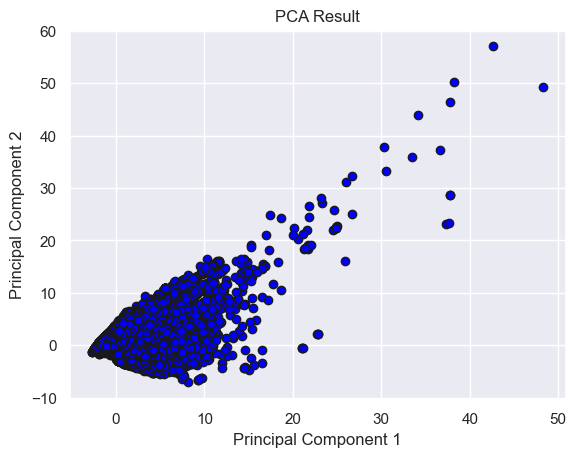

In [45]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_pca,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(520952, 2)
(130239, 2)
(520952,)
(130239,)


              precision    recall  f1-score   support

           0       0.95      0.97      0.96     85511
           1       0.85      0.92      0.88     19403
           2       0.94      0.90      0.92      6546
           3       0.83      0.67      0.74     18779

    accuracy                           0.92    130239
   macro avg       0.89      0.87      0.88    130239
weighted avg       0.92      0.92      0.92    130239



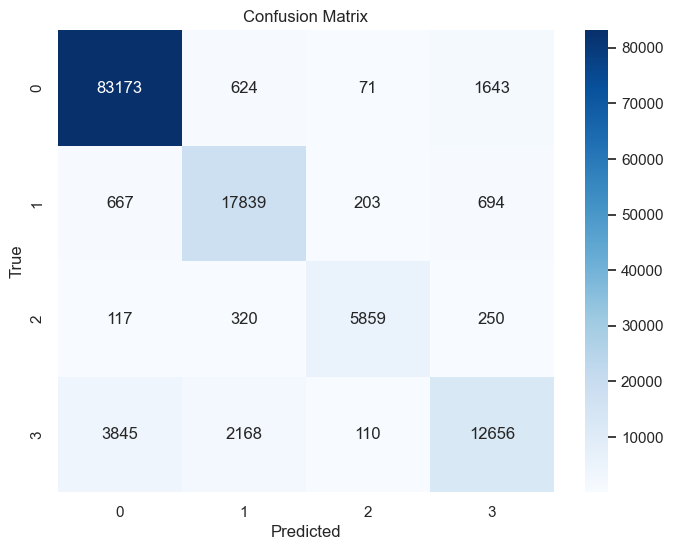

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()




# correlation analysis

In [83]:
# Check data types of all columns
print(df.dtypes)

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


url                   object
use_of_ip              int64
abnormal_url           int64
google_index           int64
count.                 int64
count-www              int64
count@                 int64
count_dir              int64
count_embed_domian     int64
short_url              int64
count-https            int64
count-http             int64
count%                 int64
count?                 int64
count-                 int64
count=                 int64
url_length             int64
hostname_length        int64
sus_url                int64
count-digits           int64
count-letters          int64
fd_length              int64
tld                   object
tld_length             int64
type_encoded           int32
dtype: object
Non-numeric columns: Index(['url', 'tld'], dtype='object')


In [84]:
import numpy as np
numeric_df=df.select_dtypes(include=[np.number])
correlation_matrix=numeric_df.corr(method='pearson')
print(correlation_matrix)

                    use_of_ip  abnormal_url  google_index    count.  \
use_of_ip            1.000000      0.164083           NaN  0.108536   
abnormal_url         0.164083      1.000000           NaN  0.213057   
google_index              NaN           NaN           NaN       NaN   
count.               0.108536      0.213057           NaN  1.000000   
count-www           -0.048539      0.345234           NaN  0.370371   
count@              -0.002743      0.032072           NaN  0.037445   
count_dir           -0.039144      0.027497           NaN  0.032865   
count_embed_domian   0.009888      0.004868           NaN  0.021311   
short_url           -0.027076     -0.048303           NaN  0.030930   
count-https         -0.014549      0.239767           NaN  0.039145   
count-http           0.156711      0.976387           NaN  0.238323   
count%              -0.012161      0.153608           NaN -0.046009   
count?              -0.050803      0.258887           NaN  0.272678   
count-

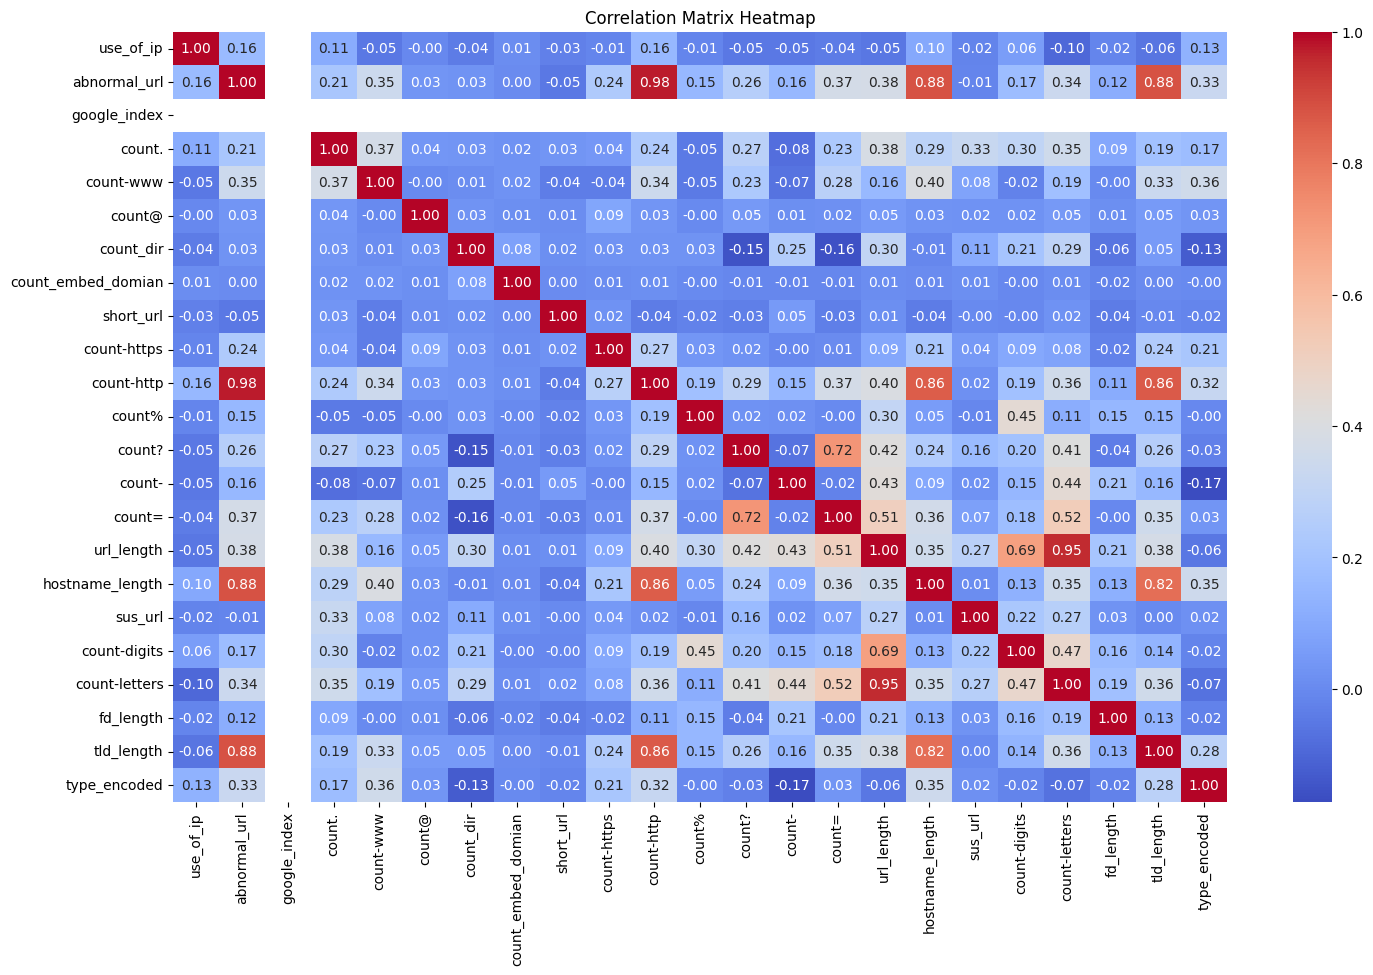

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of correlations
plt.figure(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [86]:
threshold=0.8
high_corr_features=set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j])>threshold:
            colname=correlation_matrix.columns[i]
            high_corr_features.add(colname)
print(high_corr_features)

{'count-letters', 'tld_length', 'count-http', 'hostname_length'}


In [87]:
df=df.drop(columns=high_corr_features)

In [53]:
df

,url,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,short_url,...,count%,count?,count-,count=,url_length,sus_url,count-digits,fd_length,tld,type_encoded
0,br-icloud.com.br,0,0,1,2,0,0,0,0,0,...,0,0,1,0,16,0,0,0,None,3
1,mp3raid.com/music/krizz_kaliko.html,0,0,1,2,0,0,2,0,0,...,0,0,0,0,35,0,1,5,None,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,1,2,0,0,3,0,0,...,0,0,0,0,31,0,1,7,None,0
3,http://www.garage-pirenne.be/index.php?option=...,0,1,1,3,1,0,1,0,0,...,0,1,1,4,88,0,7,9,be,1
4,http://adventure-nicaragua.net/index.php?optio...,0,1,1,2,0,0,1,0,0,...,0,1,1,3,235,0,22,9,net,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,0,0,1,3,0,0,3,0,0,...,0,0,0,0,39,0,12,7,None,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,0,0,1,2,0,0,4,0,1,...,0,0,2,0,44,0,7,8,None,3
651188,www.gamespot.com/xbox360/action/deadspace/,0,0,1,2,1,0,4,0,1,...,0,0,0,0,42,0,3,7,None,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),0,0,1,2,0,0,2,0,0,...,0,0,0,0,45,0,0,4,None,3


# NO NORMALIZATION

In [123]:
df

,url,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,short_url,...,count%,count?,count-,count=,url_length,sus_url,count-digits,fd_length,tld,type_encoded
0,br-icloud.com.br,0,0,1,2,0,0,0,0,0,...,0,0,1,0,16,0,0,0,None,3
1,mp3raid.com/music/krizz_kaliko.html,0,0,1,2,0,0,2,0,0,...,0,0,0,0,35,0,1,5,None,0
2,bopsecrets.org/rexroth/cr/1.htm,0,0,1,2,0,0,3,0,0,...,0,0,0,0,31,0,1,7,None,0
3,http://www.garage-pirenne.be/index.php?option=...,0,1,1,3,1,0,1,0,0,...,0,1,1,4,88,0,7,9,be,1
4,http://adventure-nicaragua.net/index.php?optio...,0,1,1,2,0,0,1,0,0,...,0,1,1,3,235,0,22,9,net,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,0,0,1,3,0,0,3,0,0,...,0,0,0,0,39,0,12,7,None,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,0,0,1,2,0,0,4,0,1,...,0,0,2,0,44,0,7,8,None,3
651188,www.gamespot.com/xbox360/action/deadspace/,0,0,1,2,1,0,4,0,1,...,0,0,0,0,42,0,3,7,None,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),0,0,1,2,0,0,2,0,0,...,0,0,0,0,45,0,0,4,None,3


Model Accuracy after feature elimination: 0.9633289567641029
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     85778
           1       0.97      0.99      0.98     19104
           2       0.98      0.93      0.96      6521
           3       0.90      0.86      0.88     18836

    accuracy                           0.96    130239
   macro avg       0.96      0.94      0.95    130239
weighted avg       0.96      0.96      0.96    130239



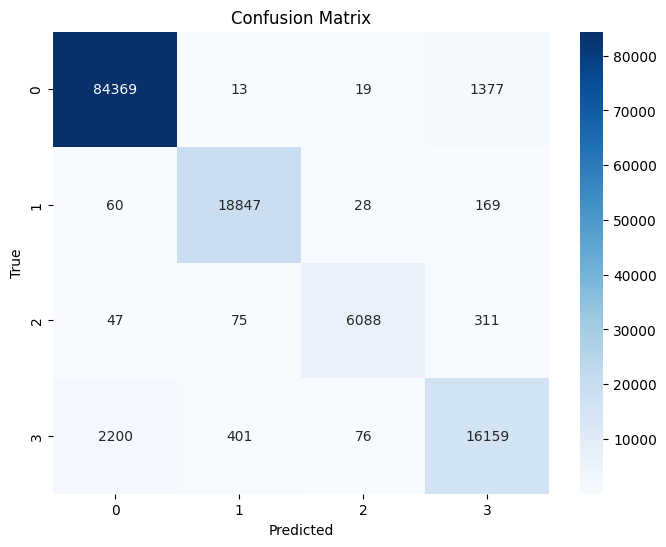

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
# X=df.drop(columns=['type_encoded'])
X = df.drop(columns=['type_encoded','url','tld']) 
Y=df['type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Model Accuracy after feature elimination:", accuracy_score(y_test, y_pred))
# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# NORMALIZATION (MIN MAX)

In [58]:
df.columns

Index(['url', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domian', 'short_url',
       'count-https', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'sus_url', 'count-digits', 'fd_length', 'tld', 'type_encoded'],
      dtype='object')

Model Accuracy after feature elimination and MinMax scaling: 0.9633136003808384
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     85778
           1       0.97      0.99      0.98     19104
           2       0.98      0.93      0.96      6521
           3       0.90      0.86      0.88     18836

    accuracy                           0.96    130239
   macro avg       0.96      0.94      0.95    130239
weighted avg       0.96      0.96      0.96    130239



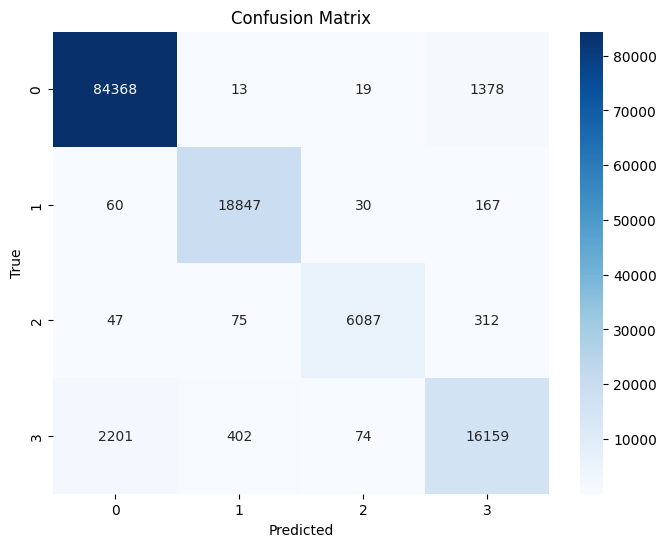

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Extract features and target
X = df.drop(columns=['type_encoded','url','tld'])  # Features
Y = df['type_encoded']  # Target variable

# Step 2: Apply MinMax Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Normalize all feature values between 0 and 1

# Step 3: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Step 4: Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate model
y_pred = model.predict(X_test)
print("Model Accuracy after feature elimination and MinMax scaling:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# Step 6: Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# prompt: how to test a ml model with user input code? import statements correct?

import numpy as np
def predicturltype(url):
  features = []
  features.append(having_ip_address(url))
  features.append(abnormal_url(url))
  features.append(google_index(url))
  features.append(count_dot(url))
  features.append(count_www(url))
  features.append(count_atrate(url))
  features.append(no_of_dir(url))
  features.append(no_of_embed(url))
  features.append(shortening_service(url))
  features.append(count_https(url))
  features.append(count_http(url))
  features.append(count_per(url))
  features.append(count_ques(url))
  features.append(count_hyphen(url))
  features.append(count_equal(url))
  features.append(url_length(url))
  features.append(hostname_length(url))
  features.append(suspicious_words(url))
  features.append(digit_count(url))
  features.append(letter_count(url))
  features.append(fd_length(url))
  features.append(tld_length(get_tld(url, fail_silently=True))) # Added tld_length

  features = np.array(features).reshape(1, 22) # Adjusted reshape to 22

  return features

# Example usage (you can replace this with user input)
user_input_url = "https://stackoverflow.com"
f = predicturltype(user_input_url)
prediction = model.predict(f)
label = label_encoder.inverse_transform(prediction)[0]
print(f"The URL '{user_input_url}' is predicted to be: {label}")
